# JALADANKI VENKATA RAVI TEJA
# ---- GRIP TASK #3 ----
# my second task

# -------------------------------------------------------------------
# Exploratory Data Analysis on Retail-Sample Super Store

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.duplicated().value_counts()

False    9977
True       17
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(9977, 13)

<AxesSubplot:ylabel='Quantity'>

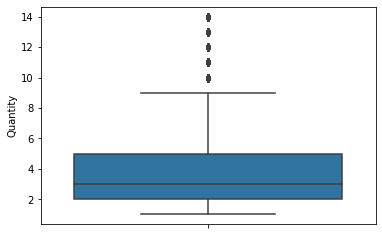

In [8]:
sns.boxplot(y=df["Quantity"])

<AxesSubplot:ylabel='Quantity'>

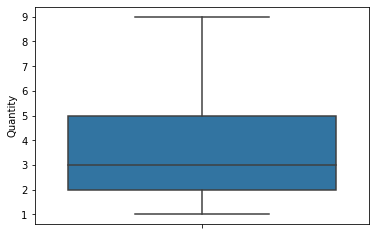

In [9]:
IQR=df["Quantity"].quantile(0.75)-df["Quantity"].quantile(0.25)
upper=df["Quantity"].quantile(0.75)+(1.5*IQR)
lower=df["Quantity"].quantile(0.25) - (1.5*IQR)
df=df.loc[(df["Quantity"]<upper)]
df=df.loc[(df["Quantity"]>lower)]
sns.boxplot(y=df["Quantity"])

In [10]:
df.shape

(9807, 13)

<AxesSubplot:ylabel='Discount'>

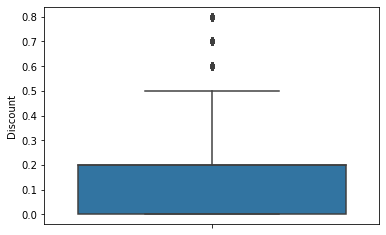

In [11]:
sns.boxplot(y=df["Discount"])

<AxesSubplot:ylabel='Discount'>

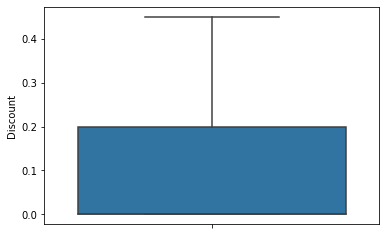

In [12]:
IQR=df["Discount"].quantile(0.75)-df["Discount"].quantile(0.25)
upper=df["Discount"].quantile(0.75)+(1.5*IQR)
lower=df["Discount"].quantile(0.25)-(1.5*IQR)
df=df.loc[(df["Discount"]<upper)]
df=df.loc[(df["Discount"]>lower)]
sns.boxplot(y=df["Discount"])

In [13]:
df.shape

(8898, 13)

# PART - 01
# EDA  against customers(consumers,corporate,home office)

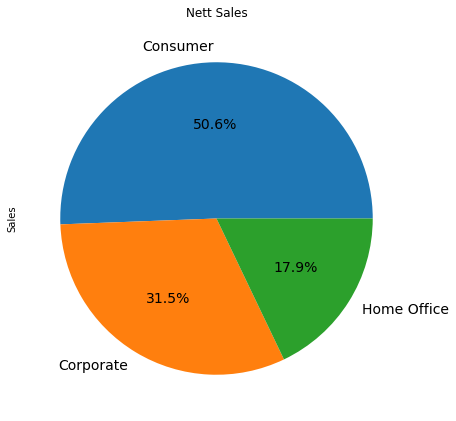

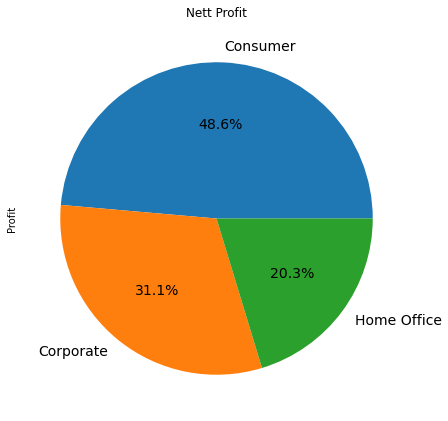

In [14]:
plt.figure(figsize=(7,8))
df.groupby("Segment").Sales.sum().plot(kind="pie",autopct='%1.1f%%',fontsize=14)
plt.title("Nett Sales")
plt.show()
plt.figure(figsize=(7,8))
df.groupby("Segment").Profit.sum().plot(kind="pie",autopct='%1.1f%%',fontsize=14)
plt.title("Nett Profit")
plt.show()

By observing the PI-charts, we can say that the Super Store is getting pretty good revenues from the CONSUMERS and CORPORATES.

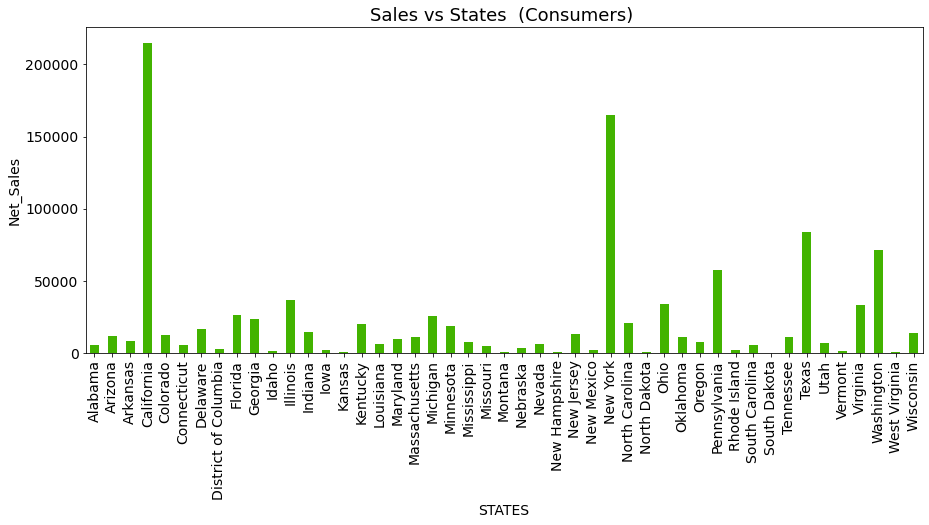

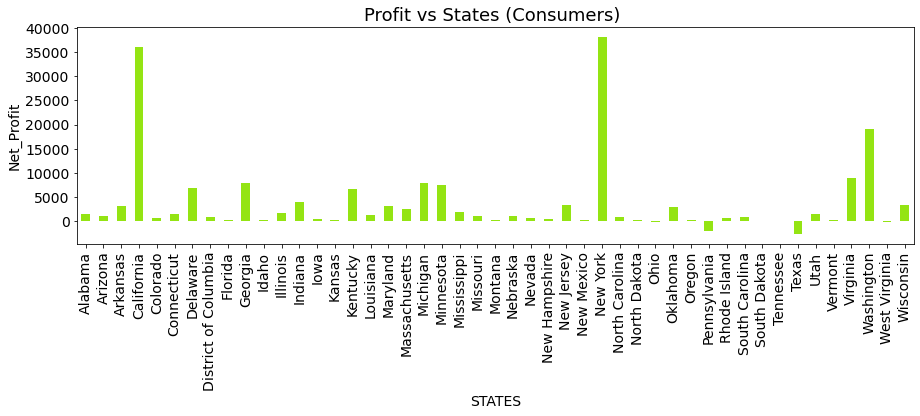

In [15]:
#Now Getting the Deep Insights of consumers customer base
consumer_df=df.loc[df["Segment"]=="Consumer"]
plt.figure(figsize=(15,6))
consumer_df.groupby("State").Sales.sum().plot(kind="bar",color = '#42B300',fontsize=14)
plt.title("Sales vs States  (Consumers) ",fontsize=18)
plt.xlabel("STATES",fontsize=14)
plt.ylabel("Net_Sales",fontsize=14)
plt.show()
plt.figure(figsize=(15,4))
consumer_df.groupby("State").Profit.sum().plot(kind="bar",color = '#94E413',fontsize=14)
plt.title("Profit vs States (Consumers) ",fontsize=18)
plt.xlabel("STATES",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()

We can observe that Store is getting more revenues from consumers in the states - California and New-York.

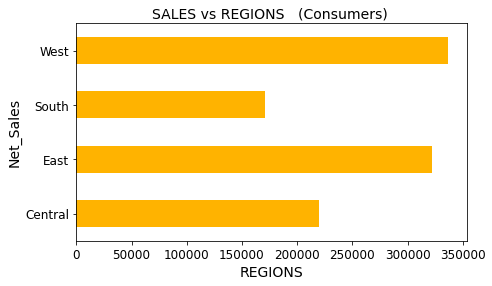

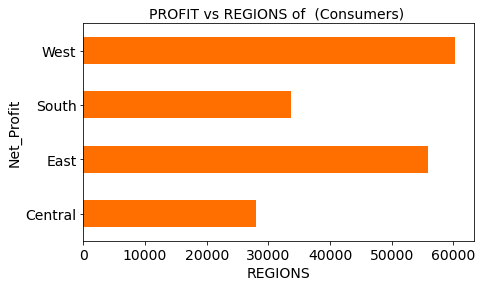

In [16]:
plt.figure(figsize=(7,4))
consumer_df.groupby("Region").Sales.sum().plot(kind="barh",color = '#FFB300',fontsize=12)
plt.title("SALES vs REGIONS   (Consumers) ",fontsize=14)
plt.xlabel("REGIONS",fontsize=14)
plt.ylabel("Net_Sales",fontsize=14)
plt.show()
plt.figure(figsize=(7,4))
consumer_df.groupby("Region").Profit.sum().plot(kind="barh",color = '#FF6F00',fontsize=14)
plt.title("PROFIT vs REGIONS of  (Consumers) ",fontsize=14)
plt.xlabel("REGIONS",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()

Thus, the Store is having a stronger reach in west and east regions i.e; Consumer base

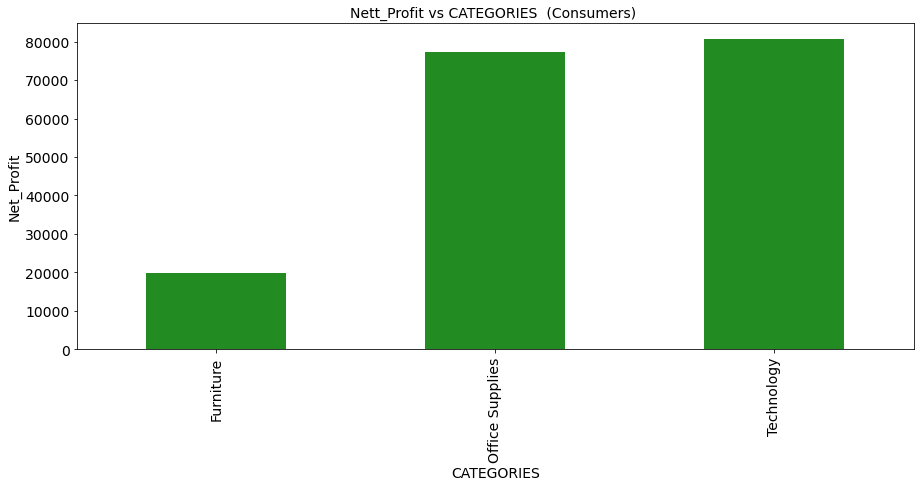

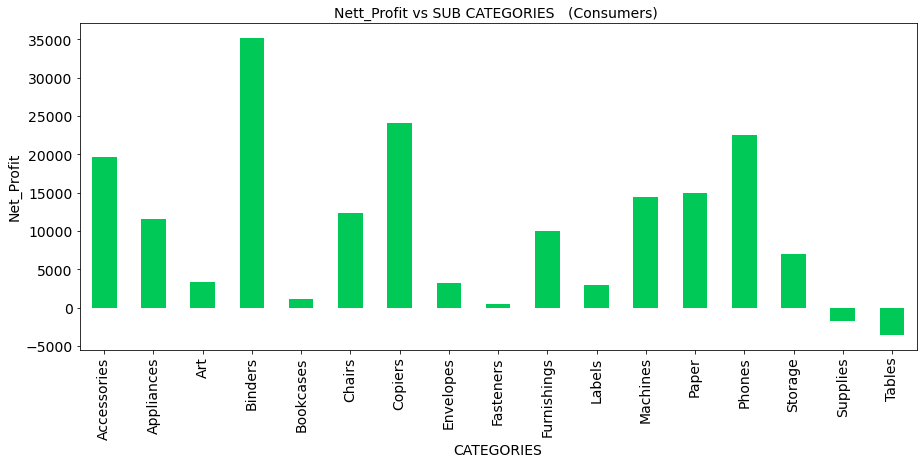

In [17]:
plt.figure(figsize=(15,6))
consumer_df.groupby("Category").Profit.sum().plot(kind="bar",color="#228B22",fontsize=14)
plt.title("Nett_Profit vs CATEGORIES  (Consumers) ",fontsize=14)
plt.xlabel("CATEGORIES",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()
plt.figure(figsize=(15,6))
consumer_df.groupby("Sub-Category").Profit.sum().plot(kind="bar",color="#00C957",fontsize=14)
plt.title("Nett_Profit vs SUB CATEGORIES   (Consumers) ",fontsize=14)
plt.xlabel("CATEGORIES",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()

CONSUMERS are showing more interest in products- COPIERS,PHONES,ACCESSORIES,BINDERS in the categories- TECHNOLOGY and OFFICE SUPPLIES

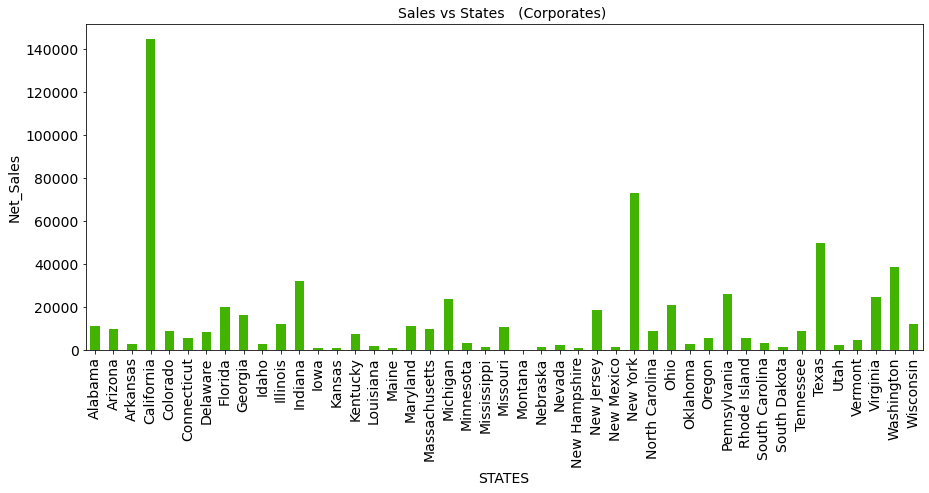

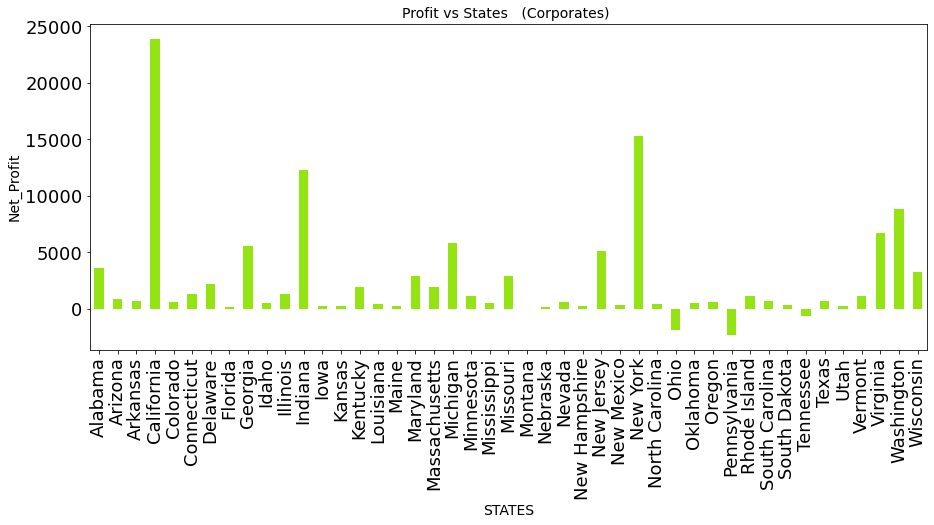

In [18]:
#Getting the Deep Insights of CORPORATE CUSTOMER BASE
corporate_df=df.loc[df["Segment"]=="Corporate"]
plt.figure(figsize=(15,6))
corporate_df.groupby("State").Sales.sum().plot(kind="bar",color = '#42B300',fontsize=14)
plt.title("Sales vs States   (Corporates) ",fontsize=14)
plt.xlabel("STATES",fontsize=14)
plt.ylabel("Net_Sales",fontsize=14)
plt.show()
plt.figure(figsize=(15,6))
corporate_df.groupby("State").Profit.sum().plot(kind="bar",color='#94E413',fontsize=18)
plt.title("Profit vs States   (Corporates) ",fontsize=14)
plt.xlabel("STATES",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()

Store is getting revenues more from CONSUMERS in the states-CALIFORNIA and NEW YORK.And Significant Lossess are seen from the Ohio and Pennsylvania State

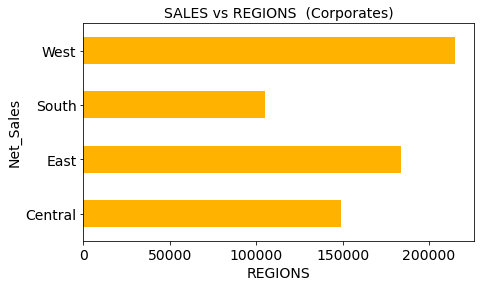

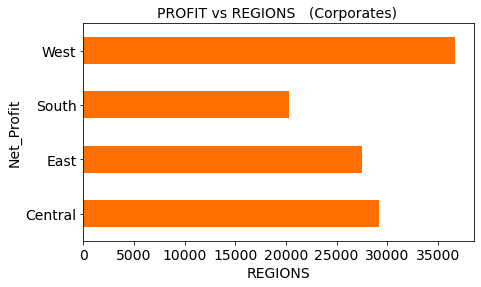

In [19]:
plt.figure(figsize=(7,4))
corporate_df.groupby("Region").Sales.sum().plot(kind="barh",color = '#FFB300',fontsize=14)
plt.title("SALES vs REGIONS  (Corporates)",fontsize=14)
plt.xlabel("REGIONS",fontsize=14)
plt.ylabel("Net_Sales",fontsize=14)
plt.show()
plt.figure(figsize=(7,4))
corporate_df.groupby("Region").Profit.sum().plot(kind="barh",color = '#FF6F00',fontsize=14)
plt.title("PROFIT vs REGIONS   (Corporates) ",fontsize=14)
plt.xlabel("REGIONS",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()

Thus,the Store is having a stronger reach in WEST & EAST REGIONS (CORPORATE BASE).

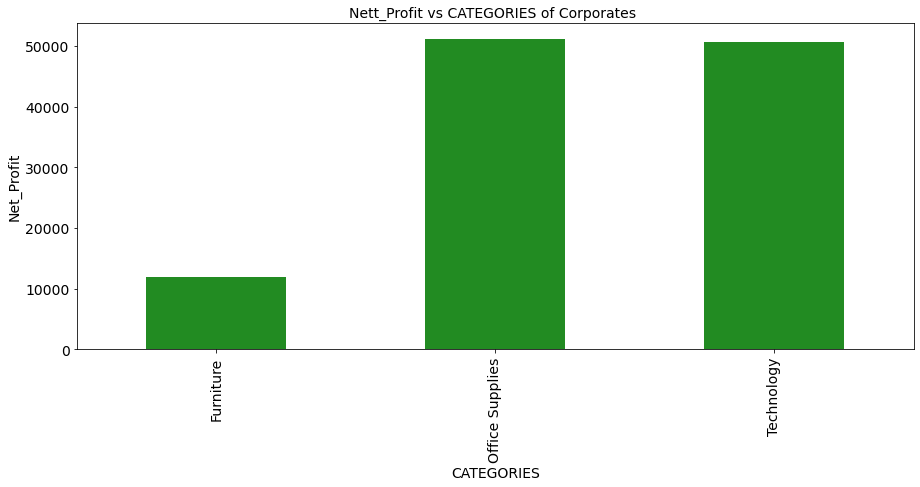

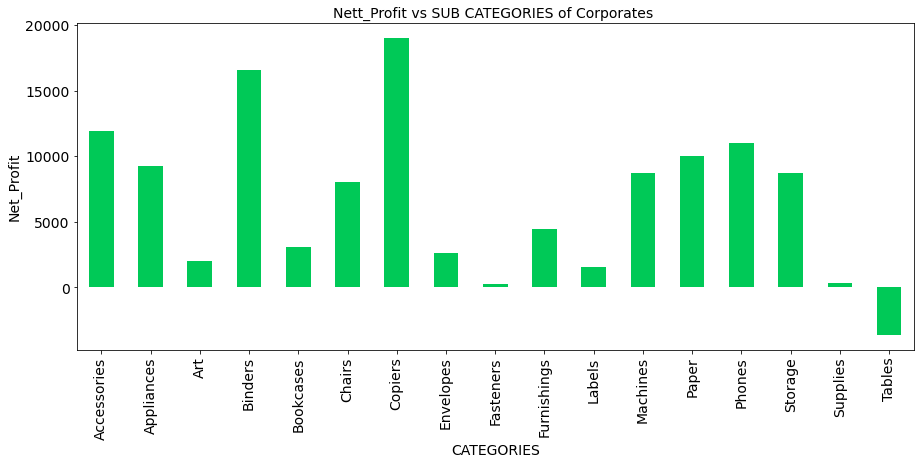

In [20]:
plt.figure(figsize=(15,6))
corporate_df.groupby("Category").Profit.sum().plot(kind="bar",color="#228B22",fontsize=14)
plt.title("Nett_Profit vs CATEGORIES of Corporates ",fontsize=14)
plt.xlabel("CATEGORIES",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()
plt.figure(figsize=(15,6))
corporate_df.groupby("Sub-Category").Profit.sum().plot(kind="bar",color="#00C957",fontsize=14)
plt.title("Nett_Profit vs SUB CATEGORIES of Corporates ",fontsize=14)
plt.xlabel("CATEGORIES",fontsize=14)
plt.ylabel("Net_Profit",fontsize=14)
plt.show()

CORPORATES are showing more interest in products- COPIERS,ACCESSORIES,PHONES,PAPER in the categories- TECHNOLOGY and OFFICE SUPPLIES

# PART - 02


We can observe from the results that offering discounts at a higher rate results in the Losses and also the Sales are not increasing

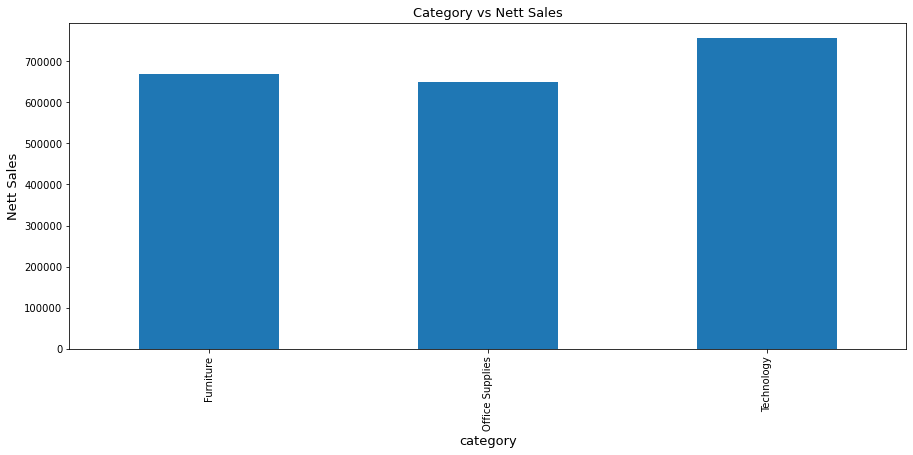

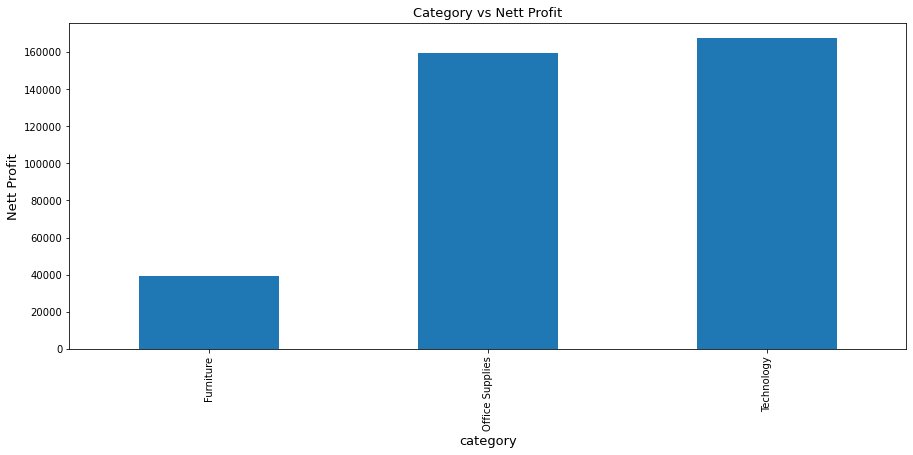

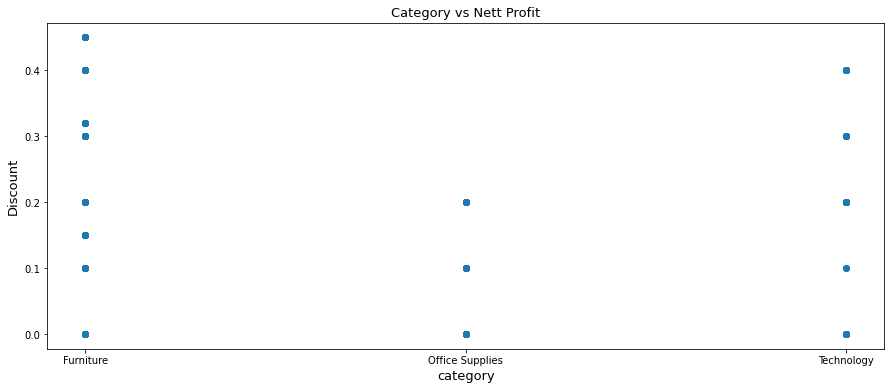

In [21]:
plt.figure(figsize=(15,6))
df.groupby("Category").Sales.sum().plot(kind="bar")
plt.title('Category vs Nett Sales',fontsize=13)
plt.xlabel('category',fontsize=13)
plt.ylabel('Nett Sales',fontsize=13)
plt.show()
plt.figure(figsize=(15,6))
df.groupby("Category").Profit.sum().plot(kind="bar")
plt.title('Category vs Nett Profit',fontsize=13)
plt.xlabel('category',fontsize=13)
plt.ylabel('Nett Profit',fontsize=13)
plt.show()
plt.figure(figsize=(15,6))
plt.scatter(df["Category"],df["Discount"])
plt.title('Category vs Nett Profit',fontsize=13)
plt.xlabel('category',fontsize=13)
plt.ylabel('Discount',fontsize=13)
plt.show()

The Store is getting more revenues in Office Supplies & Technology Categories.

Due to offering Heavy Discounts to increase the sales, the store is getting losses in Furniture Category

Lets go deep into Office Supplies Category

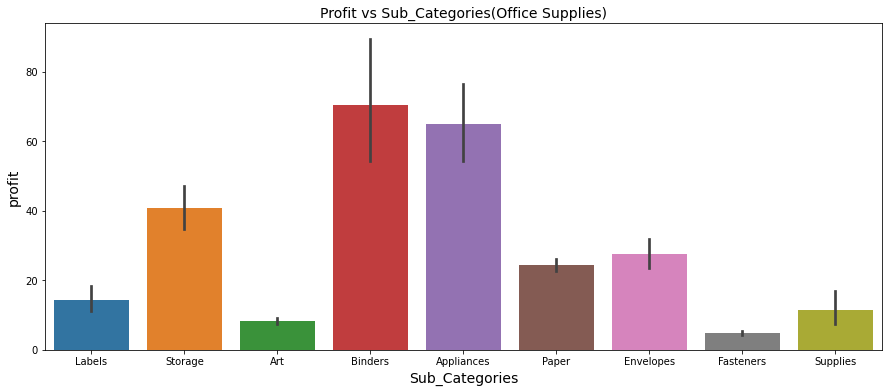

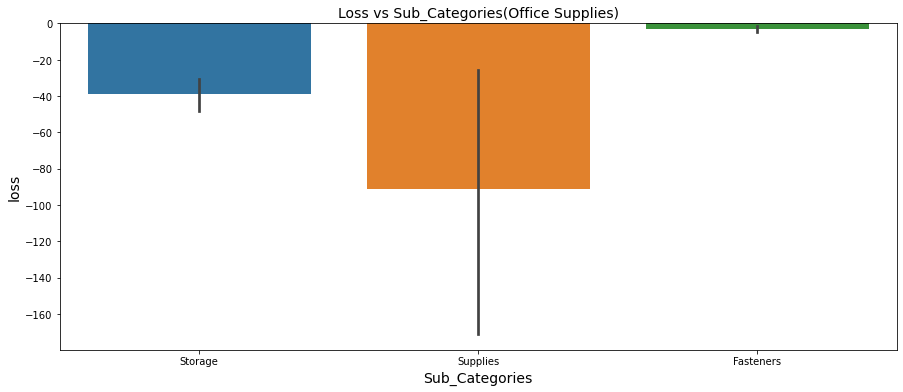

In [22]:
plt.figure(figsize=(15,6))
df_profit=df.loc[df["Profit"]>0]
sns.barplot(x=df_profit.loc[df["Category"]=="Office Supplies"]['Sub-Category'],y=df_profit["Profit"])
plt.title("Profit vs Sub_Categories(Office Supplies)",fontsize=14)
plt.xlabel("Sub_Categories",fontsize=14)
plt.ylabel("profit",fontsize=14)
plt.show()
df_loss=df.loc[df["Profit"]<0]
plt.figure(figsize=(15,6))
sns.barplot(x=df_loss.loc[df["Category"]=="Office Supplies"]['Sub-Category'],y=df_loss["Profit"])
plt.title("Loss vs Sub_Categories(Office Supplies)",fontsize=14)
plt.xlabel("Sub_Categories",fontsize=14)
plt.ylabel("loss",fontsize=14)
plt.show()

The Store is getting huge losses in Supplies & Storage

And it is getting more profits in Binders & Appliances

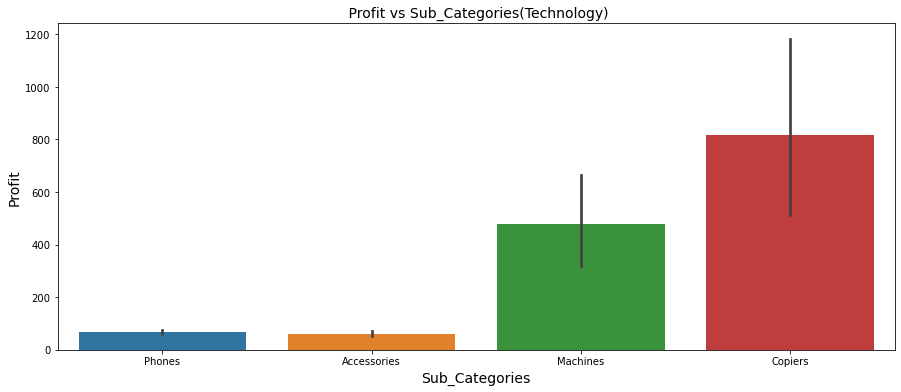

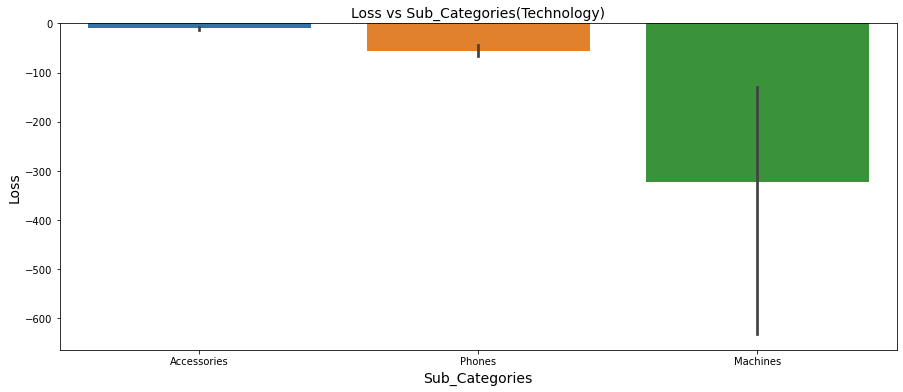

In [23]:
plt.figure(figsize=(15,6))
df_profit=df.loc[df["Profit"]>0]
sns.barplot(x=df_profit.loc[df["Category"]=="Technology"]['Sub-Category'],y=df_profit["Profit"])
plt.title(" Profit vs Sub_Categories(Technology)",fontsize=14)
plt.xlabel("Sub_Categories",fontsize=14)
plt.ylabel("Profit",fontsize=14)
plt.show()
df_loss=df.loc[df["Profit"]<0]
plt.figure(figsize=(15,6))
sns.barplot(x=df_loss.loc[df["Category"]=="Technology"]['Sub-Category'],y=df_loss["Profit"])
plt.title("Loss vs Sub_Categories(Technology)",fontsize=14)
plt.xlabel("Sub_Categories",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.show()

We can observe the following:

Copiers getting more Profit

Machines getting huge Losses

# PART - 03

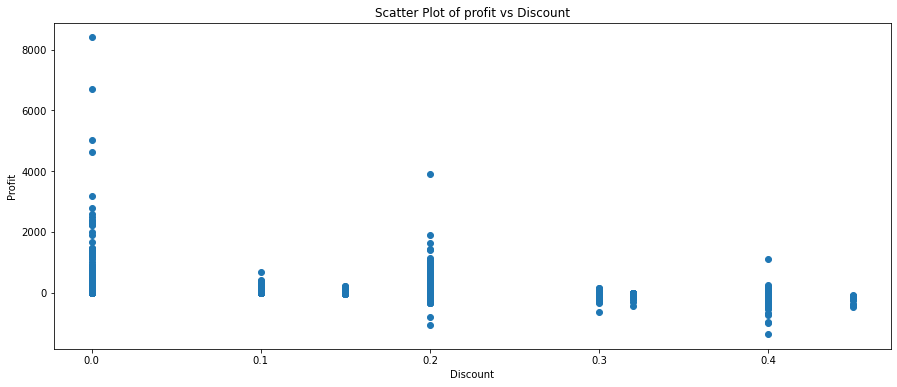

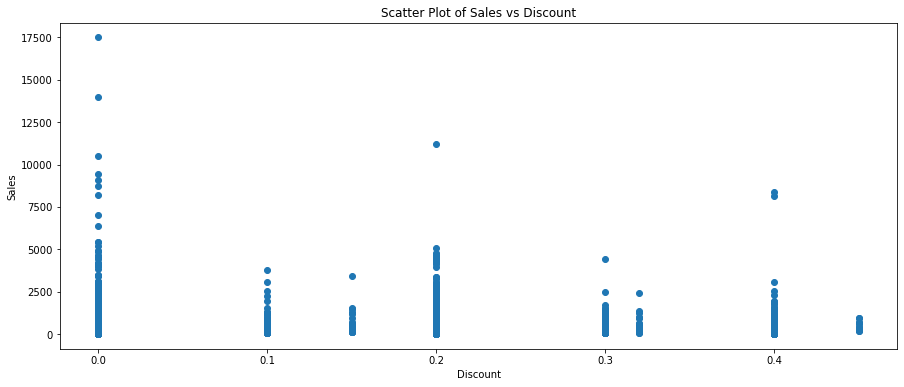

In [24]:
plt.figure(figsize=(15,6))
plt.scatter(df["Discount"],df["Profit"])
plt.title("Scatter Plot of profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()
plt.figure(figsize=(15,6))
plt.scatter(df["Discount"],df["Sales"])
plt.title("Scatter Plot of Sales vs Discount")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()

we can say offering higher discounts results in Losses to the Store

There can be some other visual perception of the data store to others ,which further adds more insights

Sharing of Analysis to others adds a lot more insights